In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


cf = '["highway"~"motorway|trunk|primary|secondary|secondary_link|motorway_link|trunk_link|primary_link|tertiary|tertiary_link"]'
#  
G = ox.graph_from_place("Ljubljana, Slovenia", network_type="drive", custom_filter=cf, simplify=True)
#fig, ax = ox.plot_graph(G, figsize=(58.33, 38.57), dpi=100, node_size=30, show=False, close=False)

# seznam osmnid-jev vozlisc
nodes_list = list(G.nodes)
# seznam povezav in atributov lanes, name, maxspeed, length
edges_list = []

# pretvorimo graf G v dva GeoDataFrame-a, enega za vozlisca in enega za povezave
nodes, edges = ox.graph_to_gdfs(G)

"""for i, row in nodes.iterrows():
    attr = row.to_dict()
    text = i
    c = attr['geometry']
    ax.annotate(text, (c.x, c.y), c='y', fontsize='x-small')
plt.show()

fig.savefig("./data/graf_krizisca_Ljubljana.png", dpi=100, pad_inches=0.0)
ox.plot_graph_folium(G)"""

'for i, row in nodes.iterrows():\n    attr = row.to_dict()\n    text = i\n    c = attr[\'geometry\']\n    ax.annotate(text, (c.x, c.y), c=\'y\', fontsize=\'x-small\')\nplt.show()\n\nfig.savefig("./data/graf_krizisca_Ljubljana.png", dpi=100, pad_inches=0.0)\nox.plot_graph_folium(G)'

In [2]:

# funckcija za računanje povprečne vrednosti v primeru seznama
def average(l):
    if isinstance(l, list):
        lst = []
        for i in l:
            num = int(i)
            lst.append(num)
        if not lst:
            return 0
        return sum(lst) / len(lst)
    # če l ni seznam
    if not isinstance(l, str):
        # za nan vrednosti
        return 0
    return int(l)

for i, row in edges.iterrows():
    attr = row.to_dict()
    u, v = i[0], i[1]

    maxspeed = average(attr['maxspeed'])
    lanes = average(attr['lanes'])

    # fiksna hitrost 50 km/h za odseke brez podatka o omejitvi hitrosti
    if maxspeed == 0:
        maxspeed = 50

    # za NaN vrednosti
    if lanes == 0:
        lanes = 1

    # enosmerna cesta
    # število pasov (lanes) je ponekod tabela vrednosti, tam vzamemo povprečje
    # za maxspeed tudi vzamemo povprečje, saj je ponekod več kot ena vrednost

    tmp = {"u" : u, "v" : v, "osmid" : attr['osmid'], "lanes" : lanes, "name" : attr['name'], "maxspeed" : maxspeed, "length" : attr['length'], "geometry" : attr['geometry'], "highway": attr['highway']}
    edges_list.append(tmp)

In [3]:
# slovar z realnimi podatki prometnih števcev za ceste z ustreznim osmid-jem
the_dict = {'983010616': 1306.0, '368284687': 975.0, '1155120764_8066980250_235883080': 450.0, '990103000_235883080_8066980250': 813.0, '343171993_3500626460_26509554': 960.5, '343171993_26509554_3500626460': 722.5, '277239741_3116918902_1400425687': 1333.0, '277239741_1400425687_3116918902': 537.0, '980728612': 1041.75, '4879417': 748.5, '1181215100': 1569.5, '983402283': 1280.0, '893172211_11091684285_26458504': 548.0, '893172211_26458504_11091684285': 415.5, '996700483': 827.5, '996702587': 599.5, '259248683': 594.0, '149769839': 1339.5, '61588598_2527973191_49369723': 422.75, '61588598_49369723_2527973191': 623.5, '1122965430_379037580_26452249': 484.5, '1122963436_26452249_379037580': 1238.0, '1156464743': 1801.0, '1156464742': 936.5, '298675152_65185643_269548288': 992.0, '298675152_269548288_65185643': 604.25, '781416273_1632640893_3160218387': 344.0, '939499546_3160218387_1632640893': 191.0, '983127894_1936740901_11001695079': 1238.5, '530977023_11001695079_1936740901': 1152.5, '867093972_60642571_5640413598': 435.0, '867093972_5640413598_60642571': 247.0, '38999640_1642106828_16179419': 782.25, '38999640_16179419_1642106828': 546.5, '113759225': 1133.0, '1097699320': 941.0, '1197099623_50824140_5735600371': 535.0, '1197099623_5735600371_50824140': 354.5, '1049451623_9644363230_59940128': 141.5, '1049451623_59940128_9644363230': 685.5, '348535332_50103978_31624897': 149.0, '348535332_31624897_50103978': 536.0, '1149757337': 1072.0, '55990326_235329965_2423779887': 325.75, '55990326_2423779887_235329965': 210.0, '546634753_8702543668_479720191': 555.5, '546634753_479720191_8702543668': 1123.5, '31661747_26506016_31815754': 620.75, '31661747_31815754_26506016': 273.5, '6652410_49914591_31581220': 457.0, '6652410_31581220_49914591': 268.0, '32947333_8063813255_26450660': 464.5, '32947333_26450660_8063813255': 189.5, '936921961_33632712_33632882': 361.75, '149731565_33632882_33632712': 319.25, '8008883_60642571_95054526': 26.0, '8008883_95054526_60642571': 167.25, '39728039_476312121_2874464548': 206.5, '39728039_2874464548_476312121': 888.0, '14386659_278564769_43545221': 667.5, '14386659_43545221_278564769': 312.0, '1015861248_3512583532_30839912': 181.0, '1015861248_30839912_3512583532': 165.0, '4777381_2219916232_16202327': 688.0, '4777381_16202327_2219916232': 237.0, '1149757336': 497.0, '1007055565': 1027.5, '923195604': 1276.0}

In [4]:
# NE POGANJAJ VEČ
import random
dict_items = list(the_dict.items())
# naključno premešamo elemente slovarja
random.shuffle(dict_items)

In [6]:
dict_items

[('983010616', 1306.0),
 ('893172211_26458504_11091684285', 415.5),
 ('546634753_8702543668_479720191', 555.5),
 ('980728612', 1041.75),
 ('343171993_3500626460_26509554', 960.5),
 ('61588598_2527973191_49369723', 422.75),
 ('38999640_16179419_1642106828', 546.5),
 ('277239741_3116918902_1400425687', 1333.0),
 ('1197099623_50824140_5735600371', 535.0),
 ('1015861248_30839912_3512583532', 165.0),
 ('149731565_33632882_33632712', 319.25),
 ('6652410_31581220_49914591', 268.0),
 ('55990326_235329965_2423779887', 325.75),
 ('1015861248_3512583532_30839912', 181.0),
 ('149769839', 1339.5),
 ('61588598_49369723_2527973191', 623.5),
 ('1049451623_59940128_9644363230', 685.5),
 ('259248683', 594.0),
 ('1097699320', 941.0),
 ('781416273_1632640893_3160218387', 344.0),
 ('1049451623_9644363230_59940128', 141.5),
 ('867093972_5640413598_60642571', 247.0),
 ('1007055565', 1027.5),
 ('32947333_8063813255_26450660', 464.5),
 ('530977023_11001695079_1936740901', 1152.5),
 ('1155120764_8066980250_2358

In [34]:
hidden_data = []

In [41]:
for i in range(9,10):
    hidden_data = []
    # ker je št. elementov v slovarju enako 68, bo velikost vzorca 10 % - prvih 8 vzorcev: velikost vzorca 7 elementov, zadnja 2 vzorca velikost vzorca 6 elementov
    sample_size = 7 if i < 8 else 6
    elif i == 8:
        counter = 56
    elif i == 9:
        counter = 62
    else:
        counter = i * sample_size
    for j in range(sample_size):
        hidden_data.append(dict_items[counter])
        counter += 1
    print(hidden_data)

[('1156464742', 936.5), ('1156464743', 1801.0), ('113759225', 1133.0), ('983402283', 1280.0), ('1181215100', 1569.5), ('298675152_269548288_65185643', 604.25), ('8008883_95054526_60642571', 167.25)]


In [42]:
# stehiometrična matrika
import numpy as np
M = np.zeros((len(nodes_list), len(edges_list)), dtype=int)

counter = 0
# reaktanti (začetna križišča) imajo negativen predznak, produkti (končna križišča) pa pozitiven predznak
for e in edges_list:
    izvor = e["u"]
    ponor = e["v"]
    M[nodes_list.index(izvor)][counter] -= 1
    M[nodes_list.index(ponor)][counter] += 1
    counter += 1

# uptake krizisca bodo tista krizisca, ki so izvor eni cesti. Ker je ta lahko dvosmerna, preverimo, da imajo edges, 
# katerim je krizisce izvor ali ponor, samo 2 osmidja krizisca

uptake_krizisca = [533705481, 533705485, 31860333, 26432546, 59150869, 8319550428, 9817465701, 95054526, 50102951, 26418271, 16174351, 26408363, 36975365, 26408387, 26408357, 2051805254, 2051805244, 26408397, 28786871, 16373831, 3502423694, 16373901, 16190868, 26445379, 235327098, 96072107, 26445405, 275313548, 1634304125, 26408569, 26408475, 16148422, 26408483, 54023542, 26408555, 26408495, 26408550, 1650833632, 16325243, 26408543, 26408501, 60735502, 16174178, 26408428, 248071903, 248071904, 26408431, 60952710, 26408437, 59916013, 16817211]
for i in range(len(M)):
    osmid_set = set()
    for j in range(len(M[0])):
        if M[i][j] != 0:
            u = edges_list[j]["u"]
            v = edges_list[j]["v"]
            osmid_set.add(u)
            osmid_set.add(v)
    if len(osmid_set) == 2:
        uptake_krizisca.append(nodes_list[i])
        

In [43]:
# formula za pretok prometa: flow = speed * density, hitrost je omejitev na tistem odseku ceste,
# gostoto prometa okvirno izračunamo: razdalja med avtomobili 2s, gostota=dolzina_odseka/razdalja_med_avtomobili

for i in edges_list:

    # razdalja med avtomobili je 2s * hitrost[m/s] = razdalja[m] 
    razdalja_med_avtomobili = 2 * (i['maxspeed'] / 3.6)

    # gostota prometa je število avtomobilov na izbrano enoto dolžine (1000m) - tj. število avtomobilov na km
    gostota_prometa = 1000/razdalja_med_avtomobili
    # pretok je neodvisen od dolžine odseka 
    # pretok je gostota prometa (v št. avtomobilov / km) * omejitev (v km / h) --> pretok = št. avtomobilov / h
    pretok = gostota_prometa * i['maxspeed']

    # tam kjer je več pasov, se pretok ustrezno poveča
    i["maxflow"] = pretok * i["lanes"]


# dodamo dejansko število avtomobilov na cestah glede na podatke s prometnih števcev
for wkey in dict_items:
    hidden = False
    if wkey in hidden_data:
        hidden = True
    key = wkey[0]
    s = key.split("_")
    if len(s) == 1:
        num = int(key)
        for el in edges_list:
            l = el["osmid"]
            if isinstance(l, list):
                if num in l:
                    el["real_maxflow"] = the_dict[key]
                    if 'hidden' in el and el["hidden"] == True:
                        el["hidden"] = False
                    elif hidden:
                        el["hidden"] = True
            else:
                if l == num:
                    el["real_maxflow"] = the_dict[key]
                    if 'hidden' in el and el["hidden"] == True:
                        el["hidden"] = False
                    elif hidden:
                        el["hidden"] = True
    else:
        osmid = int(s[0])
        u = int(s[1])
        v = int(s[2])
        for el in edges_list:
            l = el["osmid"]
            if isinstance(l, list):
                if osmid in l and el["u"] == u and el["v"] == v:
                    el["real_maxflow"] = the_dict[key]
                    if 'hidden' in el and el["hidden"] == True:
                        el["hidden"] = False
                    elif hidden:
                        el["hidden"] = True
            else:
                if l == osmid and el["u"] == u and el["v"] == v:
                    el["real_maxflow"] = the_dict[key]
                    if 'hidden' in el and el["hidden"] == True:
                        el["hidden"] = False
                    elif hidden:
                        el["hidden"] = True

In [44]:
count = 0
for el in edges_list:
    if 'hidden' in el:
        if el['hidden'] == True:
            count += 1
count

7

In [45]:
len(uptake_krizisca)

84

In [46]:
import cobra
from cobra.flux_analysis import flux_variability_analysis
# COBRApy model
model = cobra.Model('Ljubljana-jutranja-konica')

# dodamo metabolite
# v stohiometrični matriki so po vrsticah križišča, dodamo po en metabolit za vsako križišče
for idx in range(len(nodes_list)):
    metabolite = cobra.Metabolite(id=f'M{idx}-{nodes_list[idx]}', name=f'Metabolite{idx}-{nodes_list[idx]}', compartment='c')
    model.add_metabolites([metabolite])
    
# dodamo reakcije 
# najprej reakcije uničevanja vozil v križiščih
# uptake križišča nimajo reakcij uničevanja
objectives = []
stevilo_reakcij = 0
for idx in range(len(nodes_list)):
    reakcija = cobra.Reaction(id=f'R{stevilo_reakcij}-unicevanje', name=f'Reaction{stevilo_reakcij}-unicevanje')
    stevilo_reakcij += 1
    metabolite = model.metabolites.get_by_id(f'M{idx}-{nodes_list[idx]}')
    reakcija.add_metabolites({metabolite: -1.0})
    reakcija.upper_bound = 1050
    objectives.append(reakcija)
    model.add_reactions([reakcija]) 

uptakes = []   
for idx in range(len(M)):
    # uptake reakcije
    if nodes_list[idx] in uptake_krizisca:
        # dodajanje reakcij 0 -> križišče
        reakcija = cobra.Reaction(id=f'R{stevilo_reakcij}-uptake', name=f'Reaction{stevilo_reakcij}-uptake')
        stevilo_reakcij += 1
        metabolit = model.metabolites.get_by_id(f'M{idx}-{nodes_list[idx]}')
        reakcija.add_metabolites({metabolit: 1.0})
        reakcija.upper_bound = 1200.0
        reakcija.lower_bound = 500.0
        uptakes.append(reakcija)
        model.add_reactions([reakcija]) 
        
hidden_reactions = []

for idx in range(len(M[0])):  
    # dodamo reakcije cest, ki sodelujejo v tem križišču
    # poiščemo +1 in -1 v pravem stolpcu stehiometrične matrike
    
    counter = 0
    reakcija = cobra.Reaction(id=f'R{stevilo_reakcij}', name=f'Reaction{stevilo_reakcij}')
    stevilo_reakcij += 1
    for el in M[:, idx]:
        if el != 0:
            if el == 1:

                metabolit1 = model.metabolites.get_by_id(f'M{counter}-{nodes_list[counter]}')
                reakcija.add_metabolites({metabolit1: 1.0})

            elif el == -1:
                metabolit1 = model.metabolites.get_by_id(f'M{counter}-{nodes_list[counter]}')
                reakcija.add_metabolites({metabolit1: -1.0})
        counter += 1
    # če ima zapis ključ "real_maxflow" - realna vrednost s prometnega števca, potem fiksiramo to vrednost
    # če ima zapis ključ "hidden" potem bodo omejitve te reakcije teoretične, si pa zapomnimo, katere reakcije so to
    if "real_maxflow" in edges_list[idx].keys():
        if "hidden" in edges_list[idx].keys() and edges_list[idx]['hidden'] == True:
            hidden_reactions.append(reakcija)
            reakcija.upper_bound = edges_list[idx]['maxflow']
            reakcija.lower_bound = 0
        else: 
            reakcija.upper_bound = edges_list[idx]['real_maxflow']
            reakcija.lower_bound = edges_list[idx]['real_maxflow']
    else:
        reakcija.upper_bound = edges_list[idx]['maxflow']
    model.add_reactions([reakcija])

artificial_secretes = []
#target_node_id = [476270549, 1631431654, 1632640893, 476287150, 11199438780, 16202360, 476287161, 476287164, 8569299058, 5324379024, 474737209, 16148865, 16820742, 5282407249, 16179414, 16179419, 16179426, 50824140, 20282615, 16202327, 16817239, 438174907, 26505763, 1632640893, 1951535121, 8155383118, 476458633, 1653007107, 476299515, 33632882, 8493842241, 3168140934, 269548288, 16204079, 26458504, 16179368]
target_node_id = [269548288, 20282615, 16202327, 16179368, 26505763, 26458504, 33632882, 16179419, 1631431654]
for el in target_node_id:
    reakcija = cobra.Reaction(id=f'R{stevilo_reakcij}-artificial_secrete', name=f'Reaction{stevilo_reakcij}-artificial_secrete')
    artificial_secretes.append(reakcija)
    stevilo_reakcij += 1
    a = nodes_list.index(el)
    metabolit = model.metabolites.get_by_id(f'M{a}-{nodes_list[a]}')
    reakcija.add_metabolites({metabolit: -1.0})
    reakcija.upper_bound = 2000
    reakcija.lower_bound = 500
    model.add_reactions([reakcija])
    
obj = {item: -1.0 for item in objectives}
uptakes_objective = {item: 2.0 for item in uptakes}
obj.update(uptakes_objective)
model.objective = obj

the_solution = model.optimize()
#print(the_solution)
#for reaction in model.reactions:
#    print(reaction, the_solution.fluxes[reaction.id])

output_file_path = "./data/results_FBA.txt"

with open(output_file_path, 'w') as file:
    file.write(str(the_solution) + "\n")
    for reaction in model.reactions:
        line = f"{reaction} {the_solution.fluxes[reaction.id]}\n"
        file.write(line)
print(f"Results saved to {output_file_path}")




Results saved to ./data/results_FBA.txt


In [47]:
stevilo_reakcij = 993
sum = 0
for c in range(993, 1076):
    reakcija = model.reactions.get_by_id(f'R{stevilo_reakcij}-uptake')
    stevilo_reakcij += 1
    sum += the_solution.fluxes[reakcija.id]
sum
    

97703.0

In [48]:
# fiksiramo vrednosti pretokov reakcij unicevanja, reakcij sprejemanja in reakcij umetnega izlocanja na vrednost iz resitve FBA
stevilo_reakcij = 0
for c in range(993):
    reakcija = model.reactions.get_by_id(f'R{stevilo_reakcij}-unicevanje')
    stevilo_reakcij += 1
    reakcija.upper_bound = the_solution.fluxes[reakcija.id]
    reakcija.lower_bound = the_solution.fluxes[reakcija.id]
    
for c in range(993, 1076):
    reakcija = model.reactions.get_by_id(f'R{stevilo_reakcij}-uptake')
    stevilo_reakcij += 1
    reakcija.upper_bound = the_solution.fluxes[reakcija.id]
    reakcija.lower_bound = the_solution.fluxes[reakcija.id]
    
stevilo_reakcij = 3007
for c in range(len(target_node_id)):
    reakcija = model.reactions.get_by_id(f'R{stevilo_reakcij}-artificial_secrete')
    stevilo_reakcij += 1
    reakcija.upper_bound = the_solution.fluxes[reakcija.id]
    reakcija.lower_bound = the_solution.fluxes[reakcija.id]

In [49]:
from cobra.sampling import sample
s = sample(model, 1000)

In [50]:
average_flux_values = np.mean(s, axis=0)

In [51]:
for el in hidden_reactions:
    print(el, average_flux_values[el.id])

R1700: M292-95054526 --> M263-60642571 523.0284412507331
R1822: M359-269548288 --> M290-65185643 791.9169571123987
R1969: M433-476458636 --> M799-8653374399 2091.8335029886653
R1974: M436-476458649 --> M62-16817221 2735.680005033098
R2557: M747-8413102509 --> M749-8413105423 3118.7570190015413
R2565: M750-8413105424 --> M748-8413102510 1672.5711645642048
R2885: M927-10780523701 --> M593-3504669436 2809.0355660254477


In [52]:
hidden_data

[('1156464742', 936.5),
 ('1156464743', 1801.0),
 ('113759225', 1133.0),
 ('983402283', 1280.0),
 ('1181215100', 1569.5),
 ('298675152_269548288_65185643', 604.25),
 ('8008883_95054526_60642571', 167.25)]

In [53]:
for el in edges_list:
    if 'hidden' in el:
        if el['hidden'] == True:
            print(el["u"], el["v"], el["real_maxflow"])

95054526 60642571 167.25
269548288 65185643 604.25
476458636 8653374399 936.5
476458649 16817221 1801.0
8413102509 8413105423 1280.0
8413105424 8413102510 1569.5
10780523701 3504669436 1133.0


In [59]:
average_flux_values['R2565']

1672.5711645642048

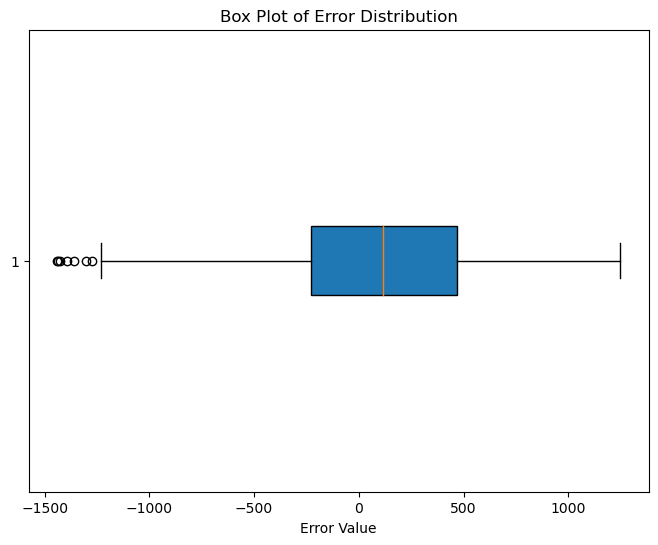

In [60]:
real_flux_values = [1569.5] * 1000
flux_sampling_results = s.get('R2565', [])

errors = [sampling_result - real_flux for sampling_result, real_flux in zip(flux_sampling_results, real_flux_values)]

data = pd.DataFrame({'Errors': errors})

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data['Errors'], vert=False, patch_artist=True)

# Customize the plot
plt.xlabel('Error Value')
plt.title('Box Plot of Error Distribution')

# Show the plot
plt.show()

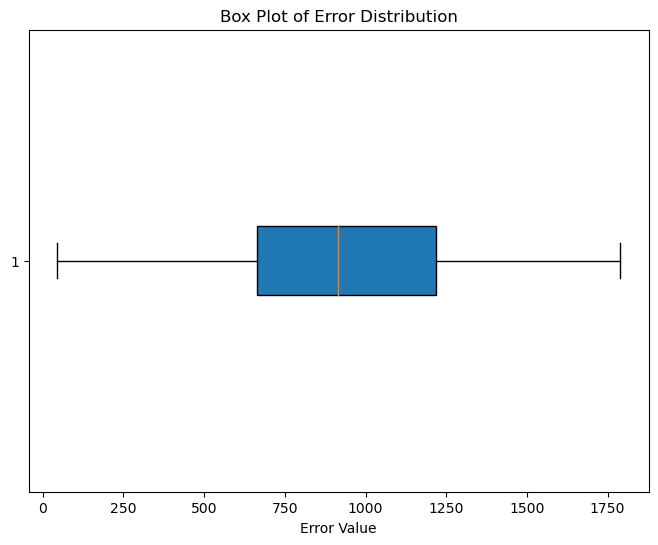

In [62]:
real_flux_values = [1801.0] * 1000
flux_sampling_results = s.get('R1974', [])

errors = [sampling_result - real_flux for sampling_result, real_flux in zip(flux_sampling_results, real_flux_values)]

data = pd.DataFrame({'Errors': errors})

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data['Errors'], vert=False, patch_artist=True)

# Customize the plot
plt.xlabel('Error Value')
plt.title('Box Plot of Error Distribution')

# Show the plot
plt.show()

In [56]:
output_file_path = "./data/results_flux sampling.csv"
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:.6f}'.format)

s.to_csv(output_file_path, index=False)

In [22]:
reaction_samples = s.get('R1671', [])

In [58]:
model.reactions[1671]

Reaction identifier,R1671
Name,Reaction1671
Memory address,0x2ba47e0bd00
Stoichiometry,M277-60876246 --> M150-26546558 Metabolite277-60876246 --> Metabolite150-26546558
GPR,
Lower bound,0.0
Upper bound,3600.0


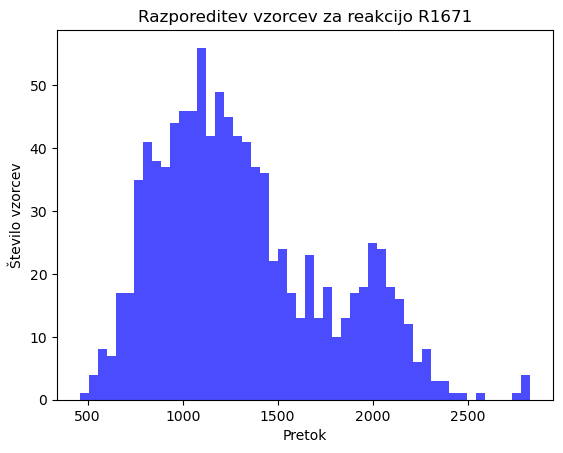

In [23]:

plt.hist(reaction_samples, bins=50, color='blue', alpha=0.7)
plt.title(f'Razporeditev vzorcev za reakcijo R1671')
plt.xlabel('Pretok')
plt.ylabel('Število vzorcev')
plt.savefig('./data/razporeditev.png')
plt.show()

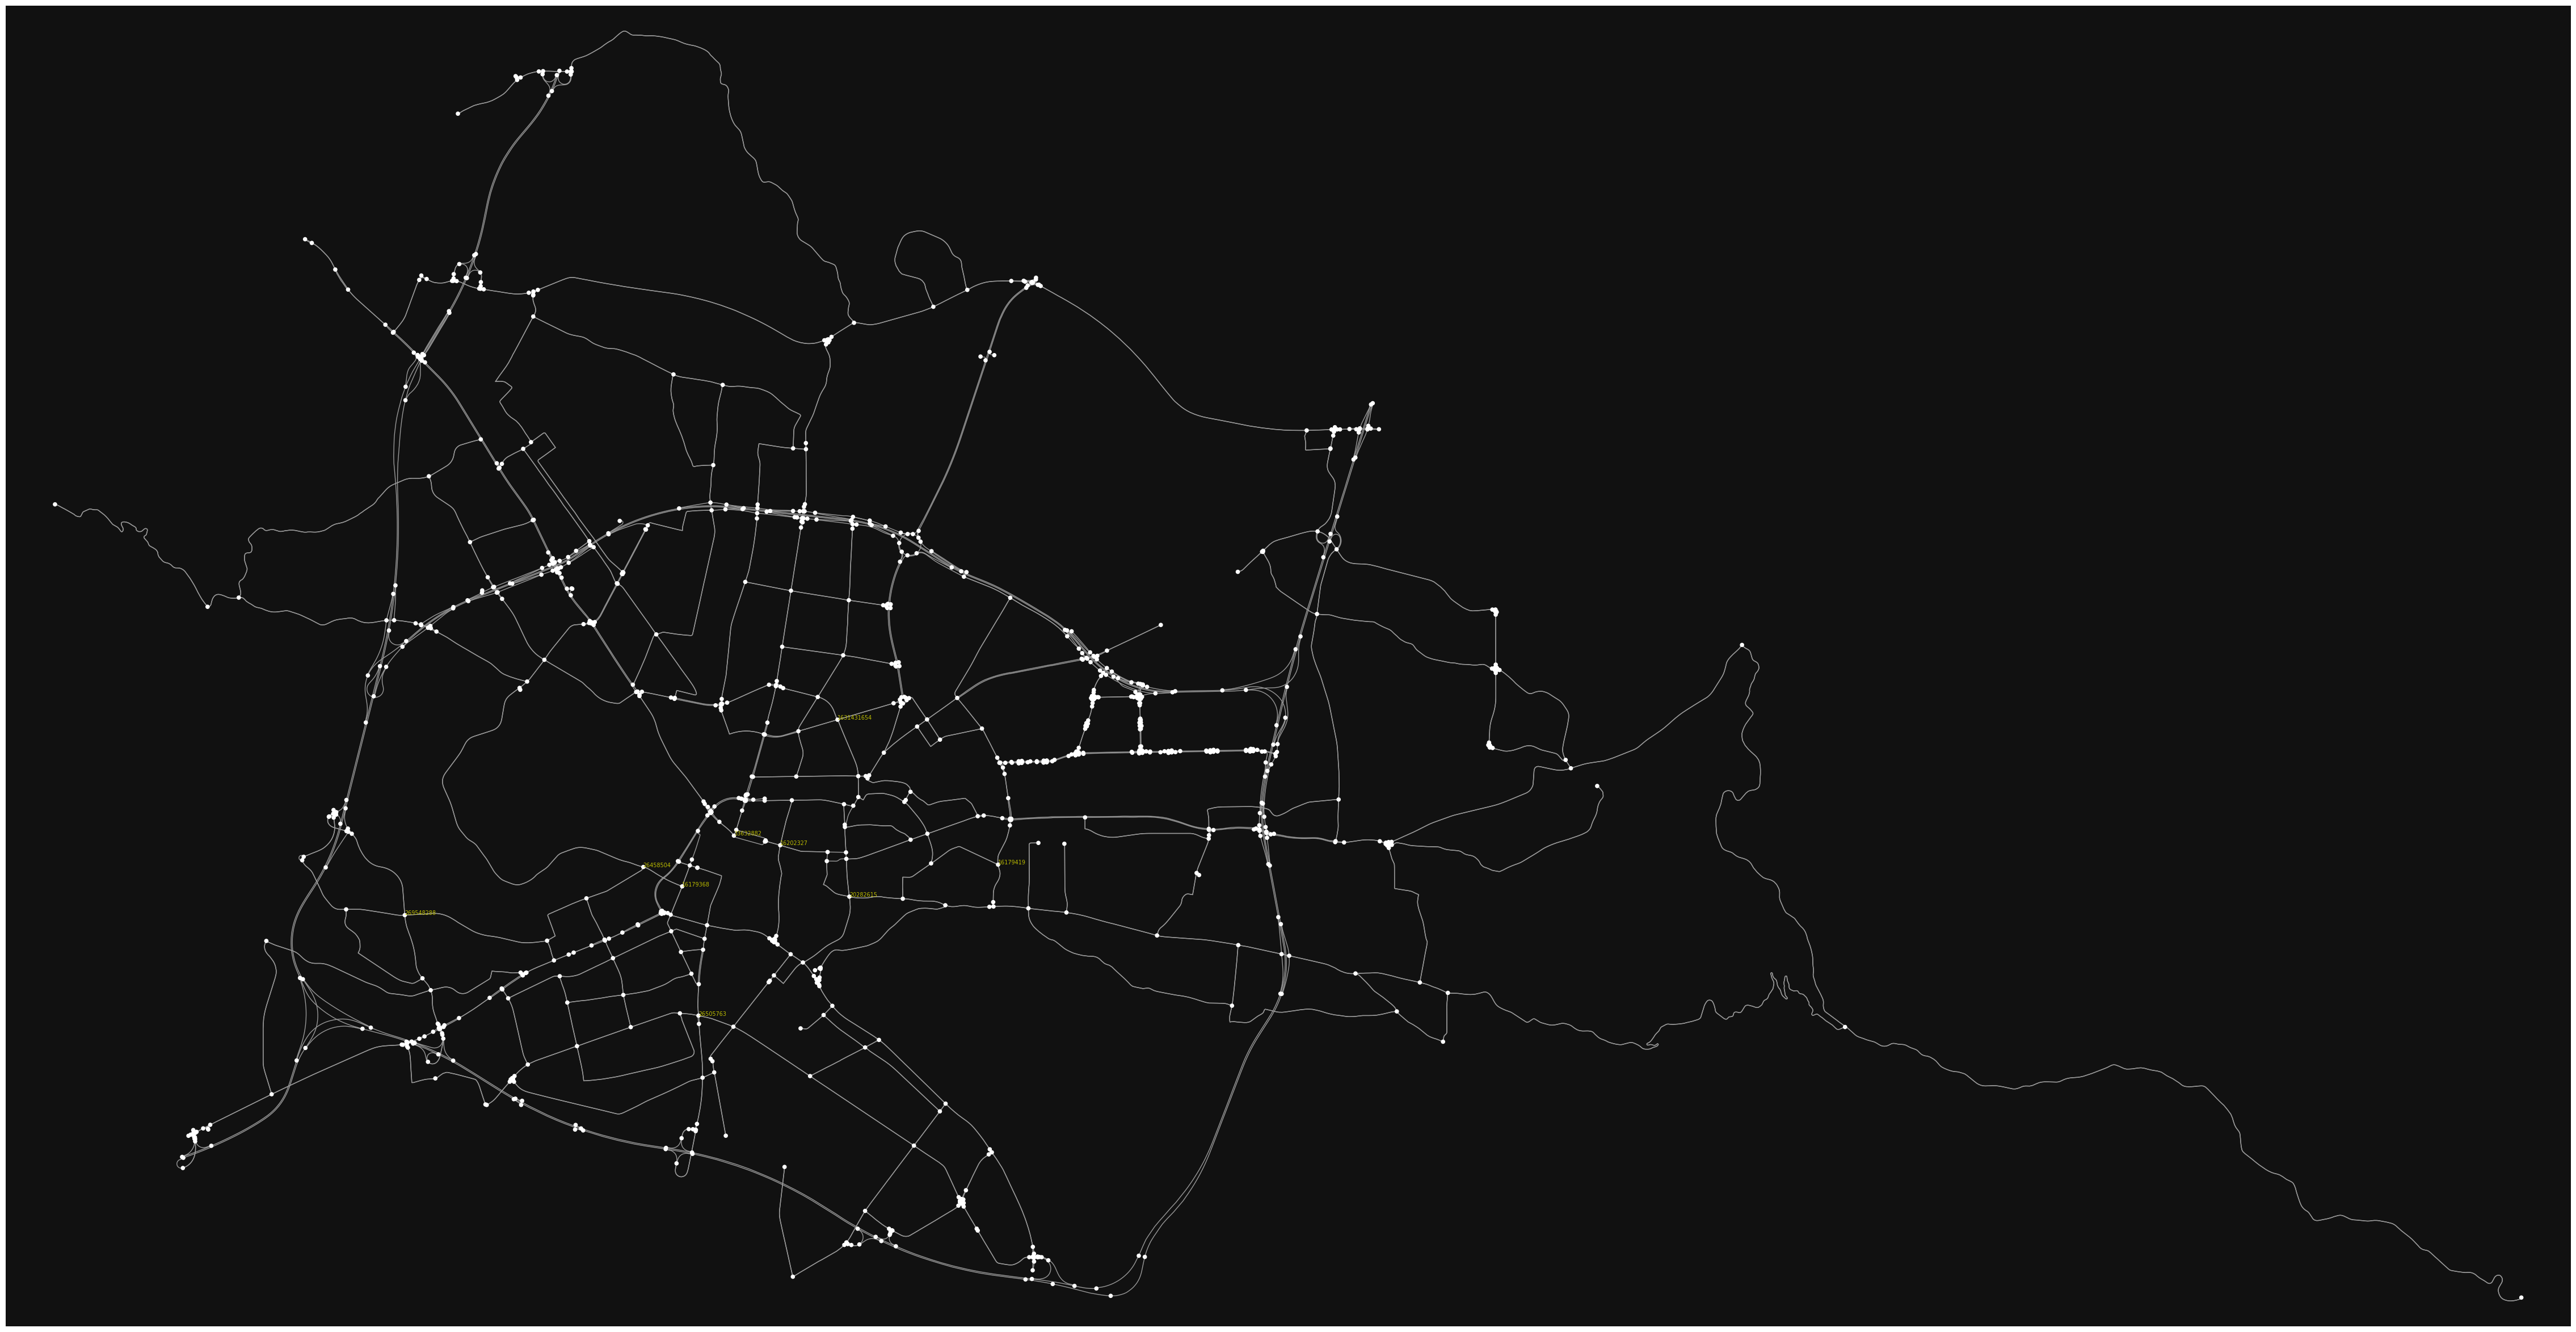

In [9]:
fig6, ax6 = ox.plot_graph(G, figsize=(58.33, 38.57), dpi=100, node_size=30, show=False, close=False)
for i, row in nodes.iterrows():
    if i in target_node_id:
        attr = row.to_dict()
        text = i
        c = attr['geometry']
        ax6.annotate(text, (c.x, c.y), c='y', fontsize='x-small')
plt.show()
fig6.savefig("./data/graf_SECRETES_Ljubljana.png", dpi=100, pad_inches=0.0) 

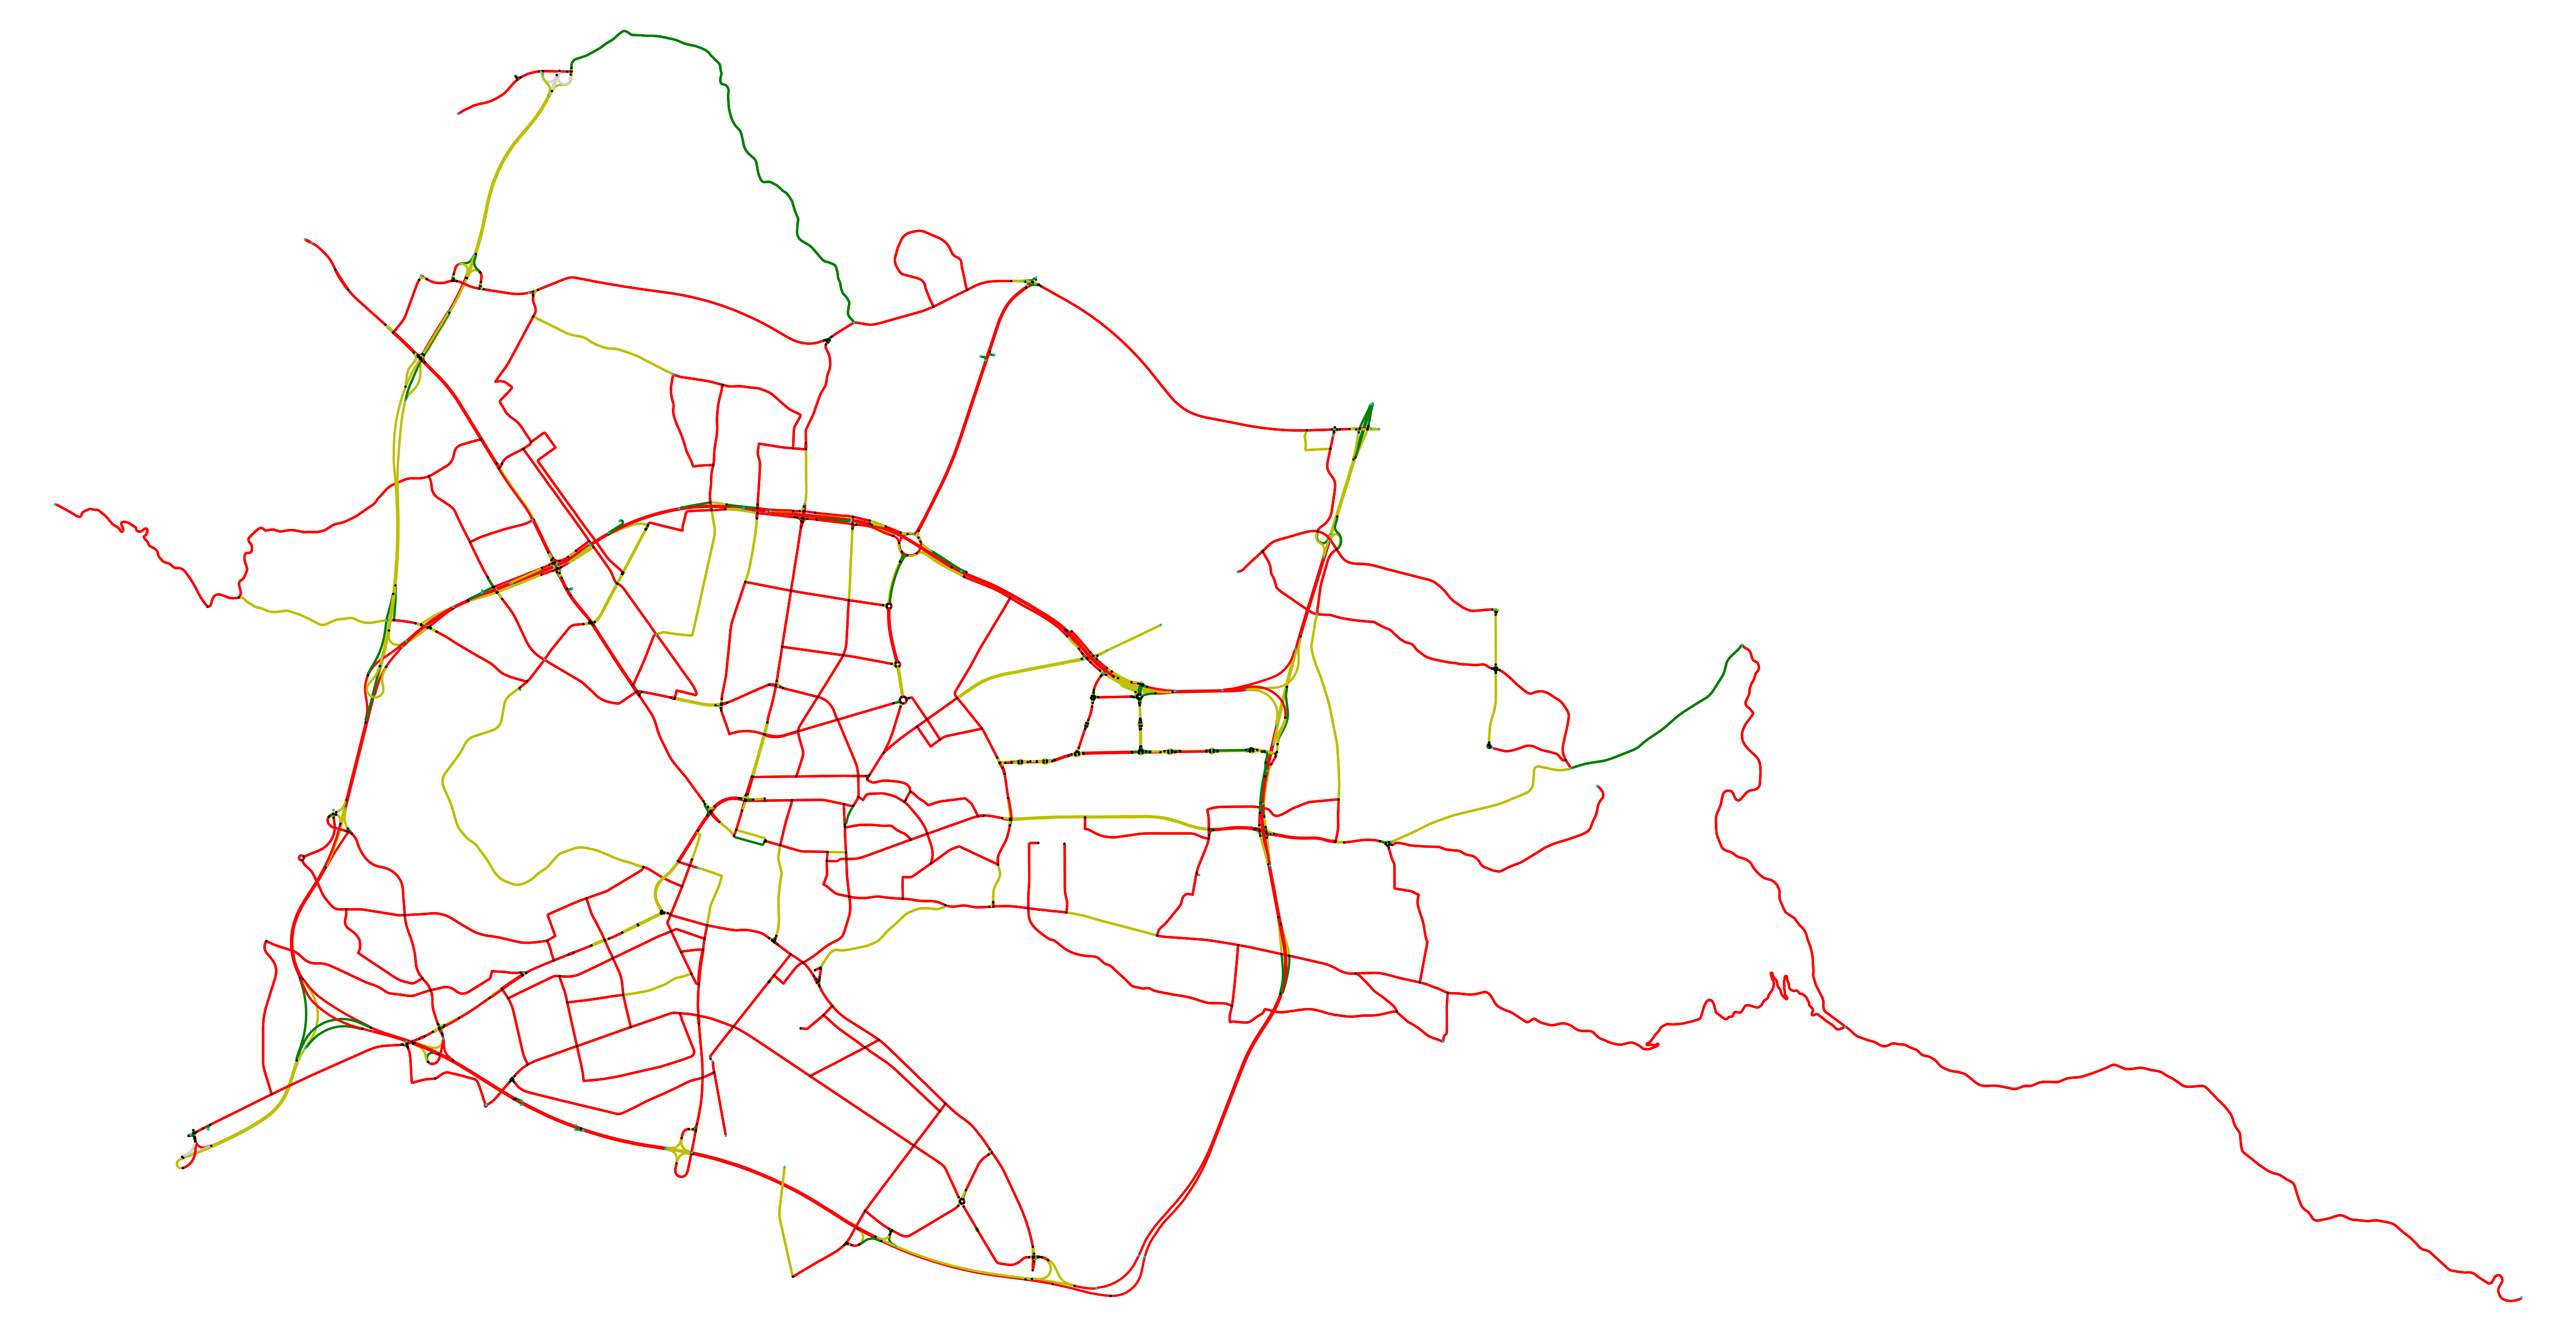

In [24]:
from matplotlib.colors import CSS4_COLORS
def najdi_pravi_edge(start, finish):
    indeksi = []
    counter = 0
    for i, row in edges.iterrows():
        if i[0] == start and i[1] == finish:
            indeksi.append(counter)
        elif i[0] == finish and i[1] == start:
            indeksi.append(counter)
        counter += 1
    return indeksi

# analiziramo pretoke po cestah in jih shranimo v tabelo, tam kjer so ločene dvosmerne ceste, bomo naredili
# vsoto pretoka v obeh smereh, ker se sicer na grafu ne prikazuje ustrezno
edges_fluxes = [0] * len(G.edges)

for reaction in model.reactions:
    try:
        r1 = reaction.reactants[0].id.split('-')[0].split('M')[1] 
        r1 = int(r1)
    except Exception:
        r1 = -1
    
    try:
        p1 = reaction.products[0].id.split('-')[0].split('M')[1]
        p1 = int(p1)
    except Exception:
        p1 = -1
    
    if r1 >= 0 and p1 >= 0:
        target_u = nodes_list[r1]
        target_v = nodes_list[p1]
        indeksi = najdi_pravi_edge(target_u, target_v)
        for ind in indeksi:
            edges_fluxes[ind] += average_flux_values[reaction.id]


barve = ['']*len(G.edges)
for i in range(len(G.edges)):
    if edges_fluxes[i] == 0:
        barve[i] = CSS4_COLORS['lightgray']
    elif edges_fluxes[i] > 0 and edges_fluxes[i] <= 500:
        barve[i] = 'g'
    elif edges_fluxes[i] > 500 and edges_fluxes[i] < 1500:
        barve[i] = 'y'
    else:
        barve[i] = 'r'


# reakcije uničevanja
barve_krizisc = ['']*len(G.nodes)
for idx in range(len(G.nodes)):
    reac = model.reactions[idx]
    id_krizisca = reac.reactants[0].id.split('-')[1]
    tmp = 'c' if average_flux_values[reac.id] > 1 else 'k'
    barve_krizisc[nodes_list.index(int(id_krizisca))] = tmp
    

fig2, ax2 = ox.plot_graph(G, figsize=(58.33, 38.57), dpi=100, node_size=10, bgcolor='white', edge_color=barve, edge_linewidth=3, node_color=barve_krizisc)

In [17]:
fig2.savefig("./data/graf_pretoki_Ljubljana_flux_sampling.png", dpi=100, pad_inches=0.0, bbox_inches='tight')